## 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화
* 데이터셋 출처 :
    * [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)
    * [KLUE Benchmark](https://klue-benchmark.com/)

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# 실습에서 wordcloud 를 사용하기 때문에 설치되어 있지 않다면 설치를 해주세요!
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud

## 라이브러리 로드

In [60]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [61]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf


In [62]:
# matplotlib에 나눔고딕 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 기본 폰트 설정
plt.rc('font', family='NanumBarunGothic')

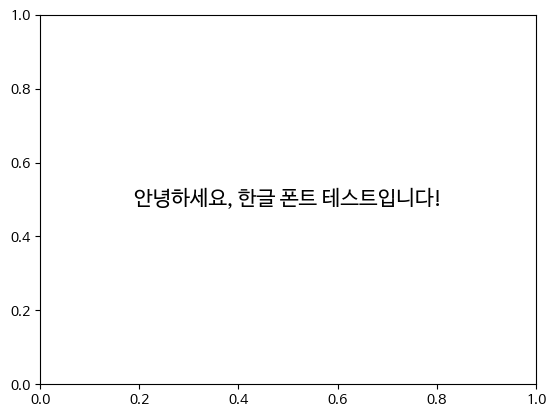

In [63]:
# 한글 테스트
plt.text(0.5, 0.5, '안녕하세요, 한글 폰트 테스트입니다!', ha='center', va='center', size=15)
plt.show()

## 데이터 로드

In [64]:
%cd /content/drive/MyDrive/mulcam_bigdata/self_ 초간단 머신러닝 텍스트 분류/data/

/content/drive/MyDrive/mulcam_bigdata/self_ 초간단 머신러닝 텍스트 분류/data


In [65]:
import os
fpath = "test_data.csv"
if os.path.exists(fpath):
    print("해당 경로에 파일이 있습니다.")
else:
    file_path = os.getcwd() +"/"+ fpath
    print(f"{file_path} 경로를 확인해 주세요.")
    print("출력되는 경로를 파일 탐색기로 열어 들어갔을 때 해당 파일이 있어야 합니다.")

해당 경로에 파일이 있습니다.


In [66]:
# 학습(data/klue/train_data.csv), 예측(data/klue/test_data.csv) 데이터셋을 불러오고
# shape 로 행과 열의 크기를 출력합니다.
# train
# test
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [67]:
# head 로 train의 상위 5개 데이터를 가져옵니다.
train.head(5)

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [68]:
# head 로 test의 상위 5개 데이터를 가져옵니다.
test.head(5)

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [69]:
# 토픽(topic_dict.csv)을 불러옵니다.
topic = pd.read_csv('topic_dict.csv')
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


## 전처리를 위한 데이터 병합
* 학습, 예측 세트를 똑같이 전처리 해주기 위해 각각 같은 방법을 적용해 줄 수도 있지만
* 두 데이터를 병합해서 전처리를 해주고 다시 나눠주겠습니다.

In [70]:
# 토픽에 어떤 값이 있는지 values로 봅니다.
topic.topic.values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

### concat
<img src="https://pandas.pydata.org/docs/_images/08_concat_row.svg" width="500">

In [71]:
# 전처리를 위해 concat으로 데이터 병합
# raw
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [72]:
train.shape[0] + test.shape[0]

54785

In [73]:
# head
raw.head(5)

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [74]:
# tail
raw.tail(5)
# 결측치 형태로 값이 비워져 있음

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


### merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>

* 실제 토픽명을 볼 수 있도록 topic_idx 를 키값으로 merge 합니다.

In [75]:
raw.shape

(54785, 3)

In [76]:
# raw 를 topic 데이터와 merge(how="left") 합니다.
# df
df = raw.merge(topic, on = 'topic_idx', how = 'left')
# topic_idx가 없는 값도 가져올 수 있음
df
# 두 개의 공통된 값이 있는 것만 merge
# df = raw.merge(topic, on = 'topic_idx')

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계
...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN


In [77]:
df.shape

(54785, 4)

In [78]:
# merge 가 잘 되었는지 head 로 확인
df.head(5)

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


## 정답값 빈도수
* train 에서 제공하는 정답값의 빈도수

In [79]:
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않습니다.
# topic_idx 의 빈도수를 구합니다.
df.topic_idx.value_counts()

,count
topic_idx,
4.0,7629
2.0,7362
5.0,6933
6.0,6751
1.0,6222
3.0,5933
0.0,4824


In [80]:
# topic 의 빈도수를 구합니다.
df.topic.value_counts()

,count
topic,
세계,7629
사회,7362
스포츠,6933
정치,6751
경제,6222
생활문화,5933
IT과학,4824


<Axes: xlabel='topic', ylabel='count'>

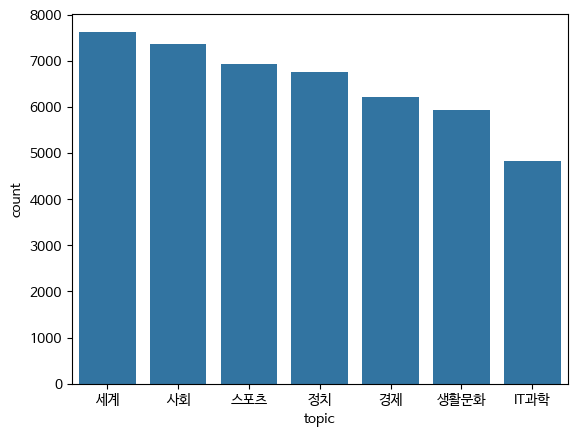

In [81]:
# df 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않습니다.
sns.countplot(data = df, x = 'topic', order = df.topic.value_counts().index)

## 문자 길이


|| Series | DataFrame | 사용 예 |
|---|---|---|---|
|map|O|X|df[“컬럼명”].map(함수 or dict)|
|apply|O|O|df.apply(함수) <br/> df[“컬럼명”].apply(함수)|
|applymap|X|O|df.applymap(함수)|

In [112]:
# apply, lambda를 통해 문자, 단어 빈도수 파생변수 만들기
# df["len"]
# df["word_count"]
# df["unique_word_count"]
df.title.map(lambda x: len(x))
df['len'] = df.title.apply(lambda x: len(x))
df["word_count"] = df['title'].apply(lambda x : len(x.split())) # 띄어쓰기 기준으로 split >> 단어의 개수
# 중복된 단어를 제거
df['unique_word_count'] = df['title'].apply(lambda x : len(set(x.split())))
df

,index,title,topic_idx,topic,54785,word_count,unique_word_count,len
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5,24
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6,30
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8,30
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7,32
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7,25
...,...,...,...,...,...,...,...,...
54780,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN,NaN,28,6,6,28
54781,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN,NaN,29,7,7,29
54782,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN,NaN,28,9,9,28
54783,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN,NaN,29,6,6,29


In [113]:
# 파생변수가 잘 만들어졌는지 확인하기
df.head()

,index,title,topic_idx,topic,54785,word_count,unique_word_count,len
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5,24
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6,30
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8,30
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7,32
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7,25


<Axes: xlabel='len', ylabel='Count'>

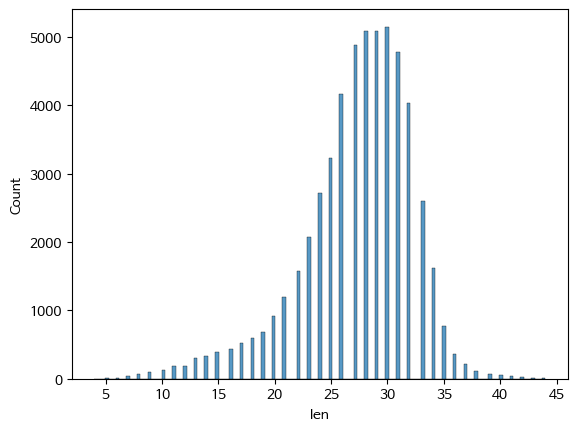

In [114]:
# 서브플롯을 통해  "len", "word_count", "unique_word_count"의 histplot 을 시각화 합니다.
sns.histplot(data = df, x = 'len')

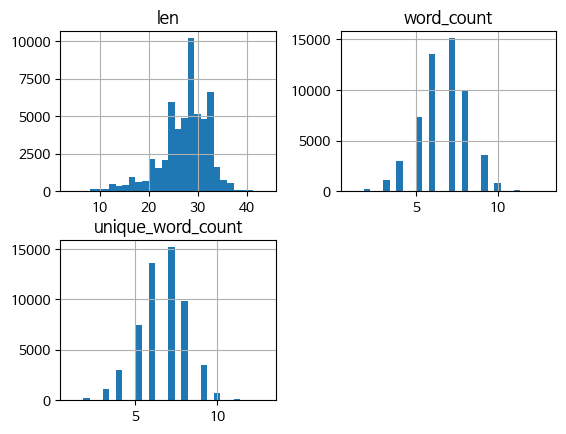

In [117]:
df[["len", "word_count", "unique_word_count"]].hist(bins = 30)
plt.show()
# 대체적으로 정규성을 가짐

In [118]:
# "len", "word_count", "unique_word_count" 의 기술통계 값을 구합니다.
df[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

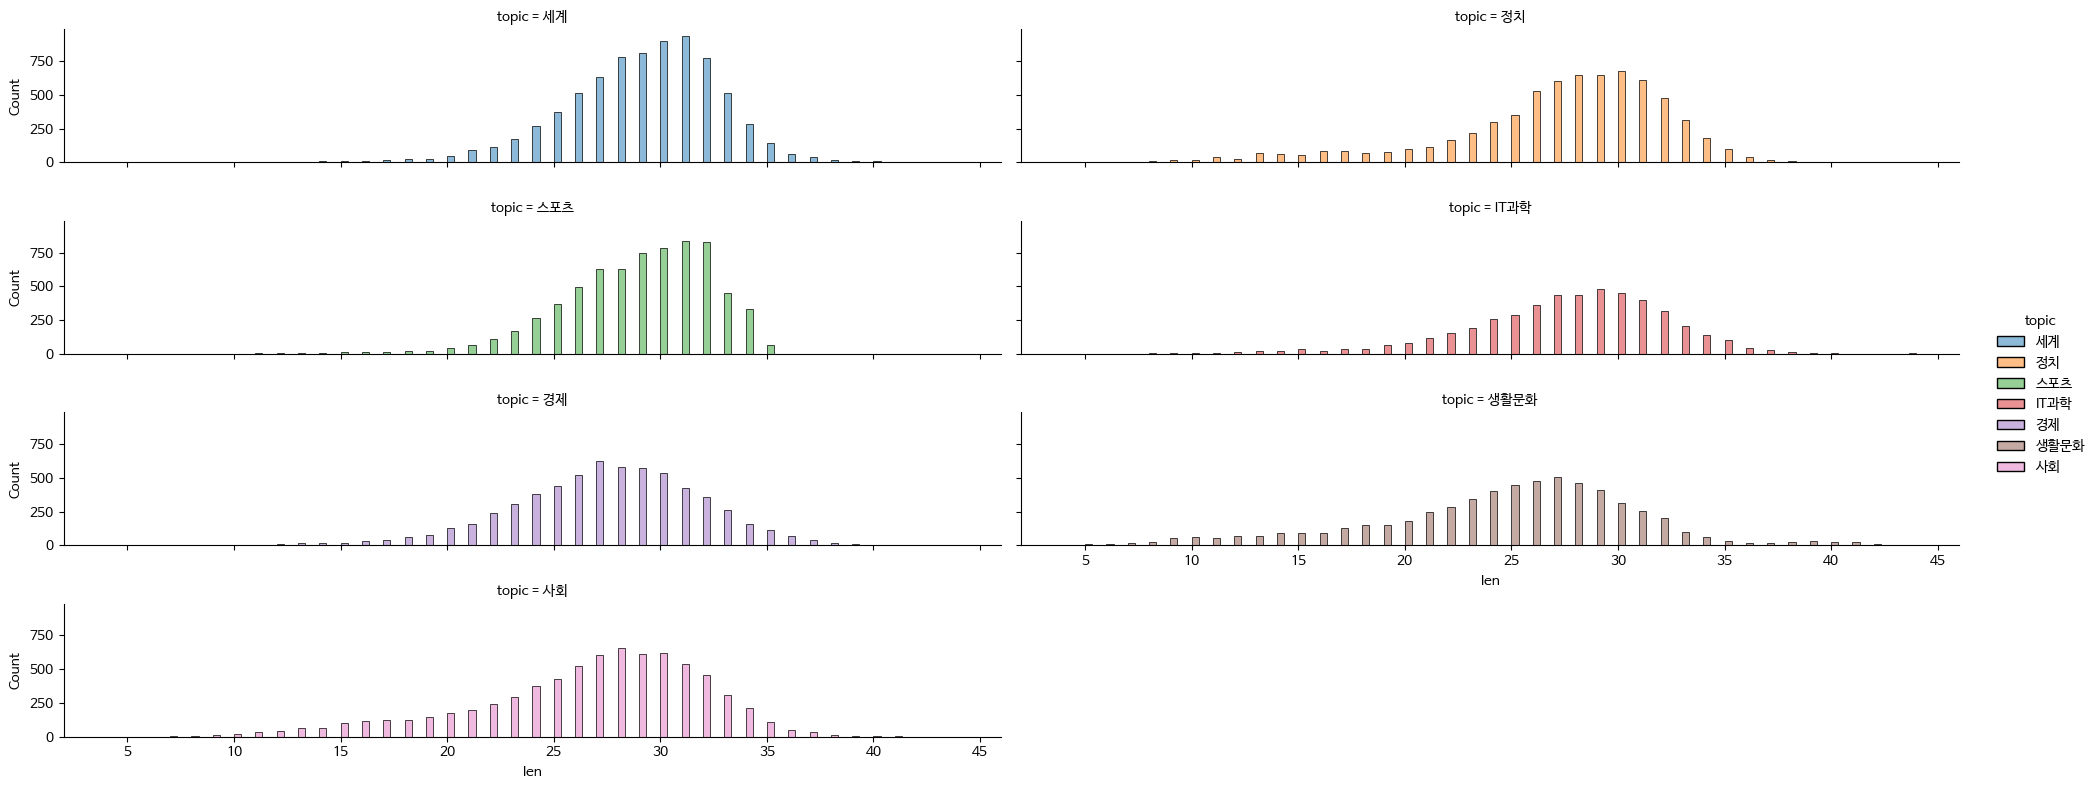

In [122]:
# 문장길이
# displot 으로 topic 별 "len" 의 histplot 시각화 하기
# data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2
sns.displot(data = df, x='len', hue = 'topic', col = 'topic', col_wrap = 2, height = 2, aspect = 5)
# 단어 길이는 대부분 비슷한 분포를 가

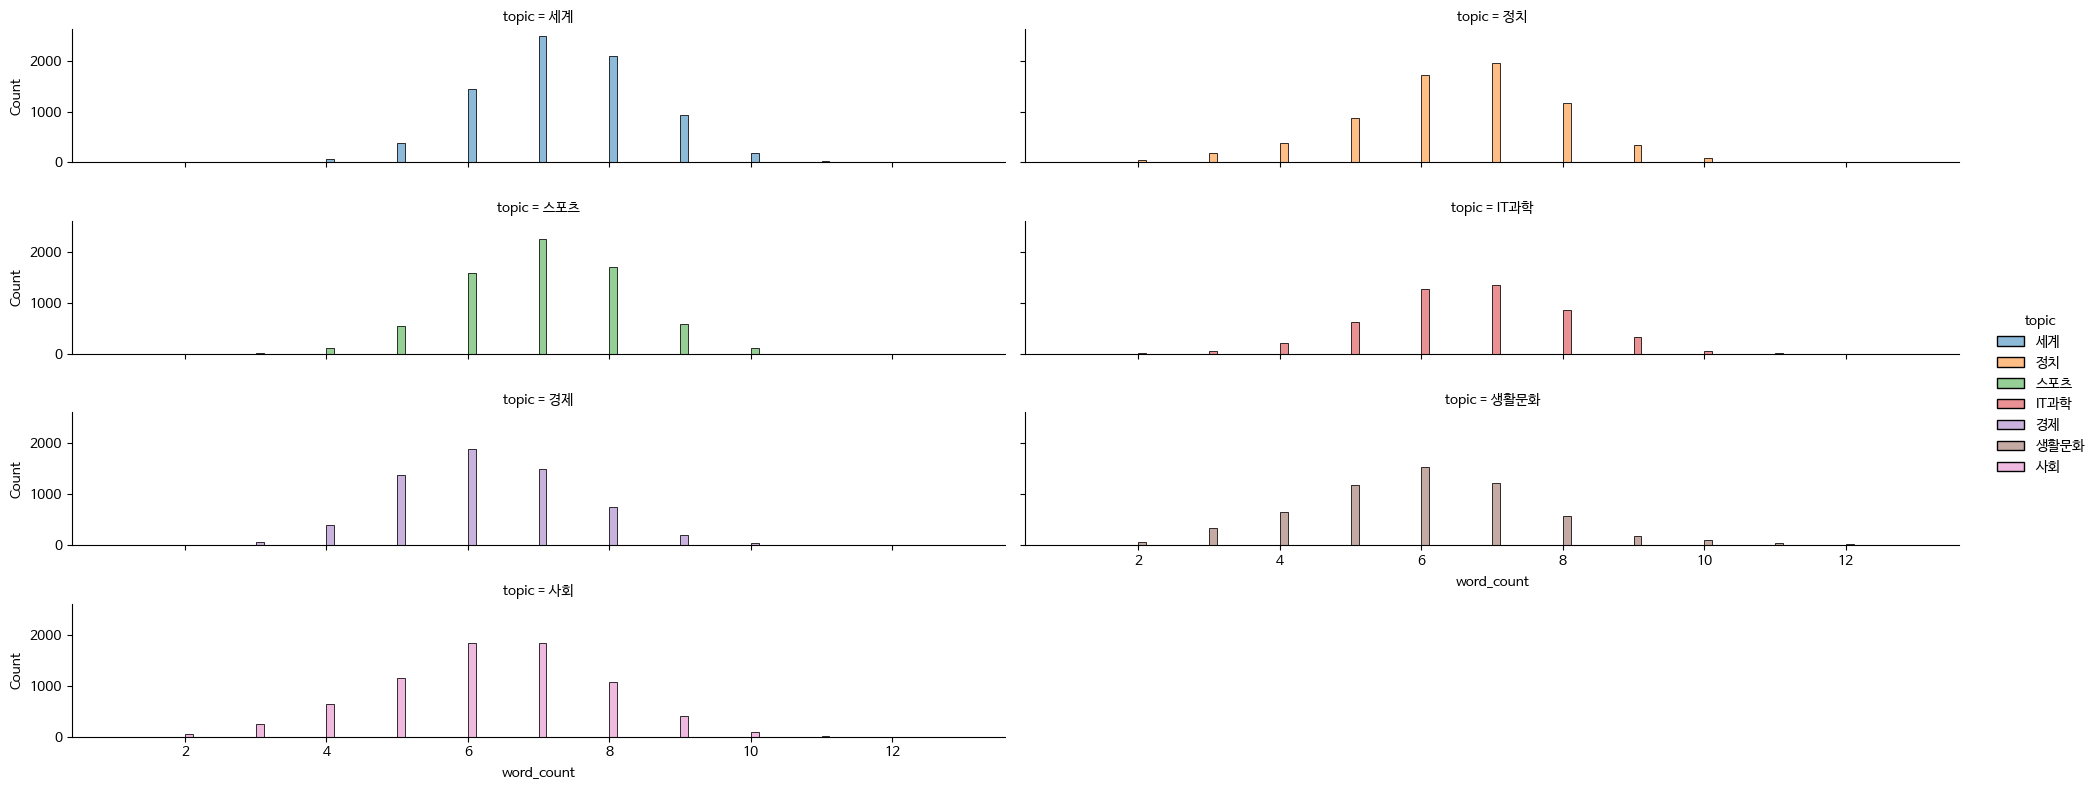

In [123]:
# 단어 수
# displot 으로 topic 별 "word_count" 의 histplot 시각화 하기
sns.displot(data = df, x='word_count', hue = 'topic', col = 'topic', col_wrap = 2, height = 2, aspect = 5)

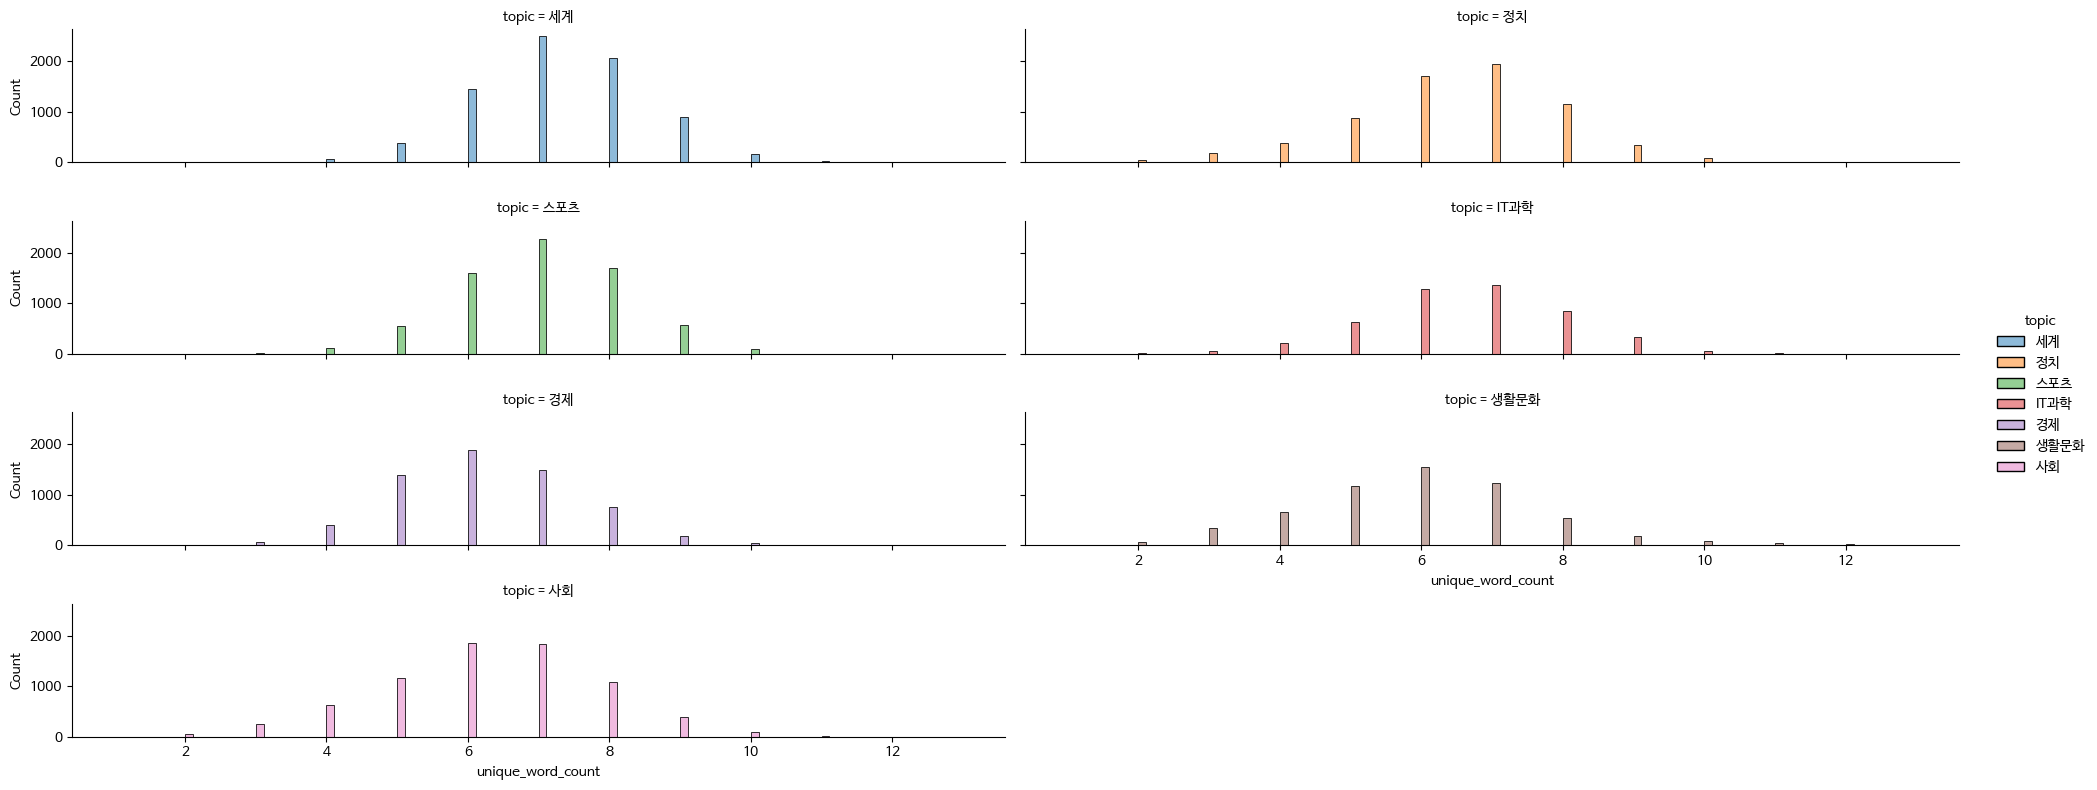

In [124]:
# 중복 제거 단어 수
# displot 으로 topic 별 "unique_word_count" 의 histplot 시각화 하기
sns.displot(data = df, x='unique_word_count', hue = 'topic', col = 'topic', col_wrap = 2, height = 2, aspect = 5)

<Axes: >

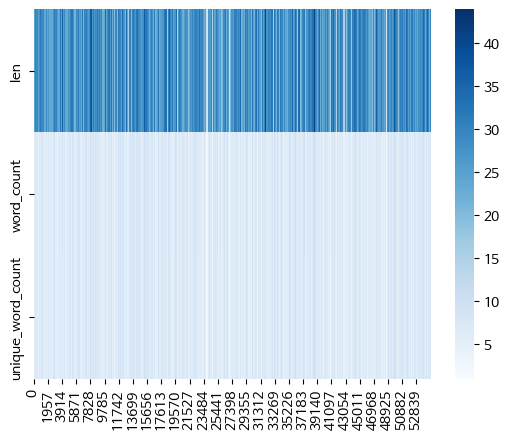

In [125]:
# heatmap 을 통한 "len", "word_count", "unique_word_count" 시각화
sns.heatmap(df[['len', "word_count", "unique_word_count"]].T, cmap = 'Blues')

## 문자 전처리
### 숫자 제거

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


In [90]:
# map, 정규표현식의 re.sub 을 통해 숫자제거
import re
df["title"]

Output hidden; open in https://colab.research.google.com to view.

In [91]:
# 판다스의 str.replace 기능을 통해 제거
df["title"]

Output hidden; open in https://colab.research.google.com to view.

### 특수 문자 제거

In [92]:
# 특수 문자 제거 시 구두점 참고
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
# 특수 문자 사용시 정규표현식에서 메타 문자로 특별한 의미를 갖기 때문에 역슬래시를 통해 예외처리를 해주어야 합니다.
# [!\"\$\*] 일부 특수문자 제거 연습
df["title"]

Output hidden; open in https://colab.research.google.com to view.

### 영문자는 모두 소문자로 변경
* 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문

In [94]:
df["title"]

Output hidden; open in https://colab.research.google.com to view.

### 한글, 영문과 공백만 남기고 모두 제거

In [95]:
# 정규표현식 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] 을 사용하면 한글과 공백만 남기고 제거하게 됩니다.
df["title"]

Output hidden; open in https://colab.research.google.com to view.

### 공백 여러 개는 하나로

In [96]:
# 공백 여러 개 전처리 예시
import re
re.sub("[\s]+", " ", "공백             전처리")

'공백 전처리'

In [97]:
# 여러 개의 공백을 하나의 공백으로 치환해 줍니다.
df["title"]

Output hidden; open in https://colab.research.google.com to view.

### 불용어 제거

In [98]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다',
             '그리고', '입니다', '그', '등', '이런', '및','제', '더']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [99]:
# map을 사용하여 불용어 제거하기
df["title"]

Output hidden; open in https://colab.research.google.com to view.

## 워드클라우드

* https://github.com/amueller/word_cloud

* 불용어, 자주 등장하는 단어, 주제별 단어 등을 시각화 하기에 좋습니다.

In [100]:
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud

In [101]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["합니다", "입니다"],
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [102]:
# join()을 이용하여 변수 title 리스트에서 문자열로 변환해 줍니다.
# content

In [103]:
# content를 위에서 만든 함수인 display_word_cloud로 워드클라우드를 시각화 해봅니다.


## 특정 토픽만 워드클라우드 시각화

In [104]:
# topic 의 unique 값만 보기


In [105]:
# df.loc로 특정 토픽만 가져와서 join으로 문자열을 연결해 줍니다.


In [106]:
# display_word_cloud 로 시각화
